<img src="https://i.imgur.com/KhGidiX.jpeg" width="600">

In [27]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.datasets import load_digits

# 設定隨機種子
seed = 0 

# 載入手寫數字資料集
X_digits, y_digits = load_digits(return_X_y=True)  # 數值特徵：數字類別

# 資料集維度
X_digits.shape

(1797, 64)

Ground Truth: 0


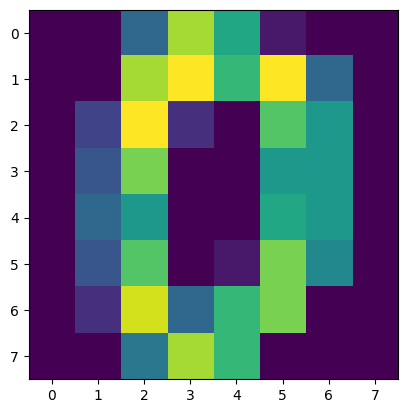

In [28]:
# 顯示數字
from matplotlib.pyplot import imshow
from PIL import Image


'''
array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])
'''
# 該圖片的數字類別
print("Ground Truth:", y_digits[0])

# 顯示數字
imshow(X_digits[0, :].reshape(8,8))

In [29]:
# 特徵標準化
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# 標準化
# scaler = StandardScaler()
# scaler = scaler.fit(X_digits)
# data = scaler.transform(X_digits)
# data

# 標準化
data = scale(X_digits)

In [30]:
# 取出資料集的數字類別數
n_digits = len(np.unique(y_digits))

# 取出資料集的樣本數和特徵數
n_samples, n_features = data.shape

# 輸出資料集的數字類別數、樣本數和特徵數
print(f"n_digits: {n_digits}, n_samples: {n_samples}, n_features: {n_features}")

n_digits: 10, n_samples: 1797, n_features: 64


In [31]:
# 建立兩個 K-Means 模型，除以下參數設定外，其餘為預設值
# #############################################################################
# kmean1: init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed
# kmean2: init='random', n_clusters=n_digits, n_init=10, random_state=seed
# #############################################################################
from sklearn.cluster import KMeans

# 建立兩個 K-Means 模型
kmean1 = KMeans(
    init='k-means++', # 這個方法的優點是可以避免初始中心點過於集中
    n_clusters=n_digits, # 聚類數量
    n_init=10, # 進行多次聚類運算，選擇最好的一次
    random_state=seed # 隨機種子
)
kmean2 = KMeans(
    init='random', # 這個方法是隨機選擇初始中心點，可能會有未能預測的情況
    n_clusters=n_digits, # 聚類數量
    n_init=10, # 進行多次聚類運算，選擇最好的一次
    random_state=seed # 隨機種子
)

In [32]:
# 利用 PCA 結果建立 K-Means 模型，除以下參數設定外，其餘為預設值
# #############################################################################
# pca: n_components=n_digits, random_state=seed
# kmean3: init=pca.components_, n_clusters=n_digits, n_init=1, random_state=seed
# #############################################################################
from sklearn.decomposition import PCA

# 降維
pca = PCA(
    n_components=n_digits, # 降維後的維度
    random_state=seed # 隨機種子
)
pca = pca.fit(data)

'''
pca.components_
代表特徵向量，每一列代表一個主成分，每一行代表一個特徵
'''

# 使用 PCA 結果建立 K-Means 模型
kmean3 = KMeans(
    init=pca.components_, 
    n_clusters=n_digits, 
    n_init=1, 
    random_state=seed
)

In [33]:
# 分別計算上述三個 K-Means 模型的輪廓係數(Silhouette coefficient)與
# 分類準確率(accuracy)，除以下參數設定外，其餘為預設值
# #############################################################################
# silhouette_score: metric='euclidean'
# #############################################################################
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

lst_name = ['K-Mean (k-means++)', 'K-Means (random)', 'K-Means (PCA-based)']
lst_model = [kmean1, kmean2, kmean3]

# 輸出輪廓係數與分類準確率
for name, model in zip(lst_name, lst_model):
    # 訓練模型
    model.fit(data)

    # 輪廓係數
    silhouette = silhouette_score(data, model.labels_, metric='euclidean')

    # 分類準確率
    acc_score = accuracy_score(y_digits, model.labels_)
    
    print(f'{name}: Silhouette={silhouette:.4f}, Accuracy={acc_score:.4f}')

K-Mean (k-means++): Silhouette=0.1471, Accuracy=0.2059
K-Means (random): Silhouette=0.1467, Accuracy=0.1135
K-Means (PCA-based): Silhouette=0.1400, Accuracy=0.0979


In [34]:
# 進行 PCA 降維後再做 K-Means，除以下參數設定外，其餘為預設值
# #############################################################################
# kmeans: init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed
# PCA: n_components=2, random_state=seed
# #############################################################################

# 建立 K-Means 模型
kmeans = KMeans(
    init='k-means++', 
    n_clusters=n_digits, 
    n_init=10,
    random_state=seed
)

# 將資料進行 PCA 降維
reduced_data = PCA(n_components=2, random_state=seed).fit_transform(data)

# 訓練模型
kmeans.fit(reduced_data)

# 輪廓係數
silhouette = silhouette_score(data, kmeans.labels_, metric='euclidean')

# 分類準確率
acc_score = accuracy_score(y_digits, kmeans.labels_)

print(f"PCA+KMeans Silhouette={silhouette:.4f} Accuracy={acc_score:.4f}")

PCA+KMeans Silhouette=0.0617 Accuracy=0.0723
